In [ ]:
#Imports

import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt

# Modelos de Classificação

# Importa o algoritmo de classifcação k-vizinhos
from sklearn.neighbors import KNeighborsClassifier
# Importa o algoritmo de classifcação Naive Bayes
from sklearn.naive_bayes import GaussianNB
# Importa o algoritmo de classifção Arvore de Decisão
from sklearn.tree import DecisionTreeClassifier
# Importa o algoritmo de classificação Multilayer-Perceptron (redes neurais)
from sklearn.neural_network import MLPClassifier

# Importa o GridSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

import seaborn as sns # Biblioteca para mostrar os gráficos
sns.set()

random.seed(42)

##Titanic

Nesse tópico, iremos analisar o dataset dos passageiros que embarcaram no navio Titanic na viagem em que o mesmo afundou(1912). Nesse sentido, iremos analisar e classificar se um passageiro sobreviveu ou não ao naufrágio.

Abrindo o dataset:

In [ ]:
titanic = pd.read_csv('data/titanic.csv', header=(0))

classes = np.array(pd.unique(titanic[titanic.columns[-1]]), dtype=str)

titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Verificando quantos dados faltantes temos para cada atributo:

In [ ]:
titanic.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

A partir de uma analise visual, é possível ver que atributos como o Id do passageiro, o nome e o ticket não são atributos tão relevantes para categorizar se um passageiro sobreviveu ao naufrágio. Nisso, temos também que o atributo "Cabin"(cabine) apresenta muitos atributos faltantes, então iremos desconsiderar para a analise.

In [ ]:
titanic.drop(['PassengerId','Name', 'Ticket', 'Cabin'],axis = 1, inplace = True)
titanic.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


Como foi visto acima, temos que há dados faltantes na coluna 'Age' e na 'Embarked'. Portanto, iremos completar estes dados: atribuindo a média a quem não tem idade e a moda para quem não tem classe de embarque.

In [ ]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

Verificando se os dados foram preenchidos (isto é, não há mais dados faltantes):

In [ ]:
titanic.isnull().sum().sort_values(ascending=False)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Agora, iremos transformar os atributos nominais em númericos utilizando a técnica one-hot-encoding.

In [ ]:
titanic_original = titanic #Salvando os dados em formato nominal para analises futuras

titanic = pd.get_dummies(titanic)
titanic.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,0,3,35.000000,0,0,8.0500,0,1,0,0,1
5,0,3,29.699118,0,0,8.4583,0,1,0,1,0
6,0,1,54.000000,0,0,51.8625,0,1,0,0,1
7,0,3,2.000000,3,1,21.0750,0,1,0,0,1
8,1,3,27.000000,0,2,11.1333,1,0,0,0,1
9,1,2,14.000000,1,0,30.0708,1,0,1,0,0


Para facilitar a etapa de processamento, iremos passar os dados para o formato numpy (tornando possível a sua classificação).

In [ ]:
titanic_np = titanic.to_numpy()
nrow,ncol = titanic_np.shape
y_titanic = titanic_np[:,0]
X_titanic = titanic_np[:,1:ncol]

Assim, iremos realizar uma transformação nos dados, de modo a normalizar esses valores (essa etapa serve para balancear os dados entre as colunas, de modo que nenhum atributo sobreponha outro em nível de relevância).

In [ ]:
# Normalização
scaler = StandardScaler().fit(X_titanic)
X_titanic = scaler.transform(X_titanic)

(CÓPIA-MONITOR) Para realizar a classificação é necessário separar o dataset em conjunto de treino e conjunto de teste. O Conjunto de treino será utilizado no treino do classificador, e o conjunto de teste será utilizado para verificar a eficácia do classificador.

In [ ]:
# Seleciona os conjuntos de treinamento e teste
p = 0.75 #Selecionaremos 25% dos dados para teste e 75% para treino
X_titanic_train, X_titanic_test, y_titanic_train, y_titanic_test = train_test_split(X_titanic, y_titanic, train_size = p, random_state=42)

Agora, é interessante realizar algumas observações sobre o balancemento dos valores entre as colunas:

Observando o número de sobreviventes (1.0) em comparação com o número de não-sobreviventes (0.0):

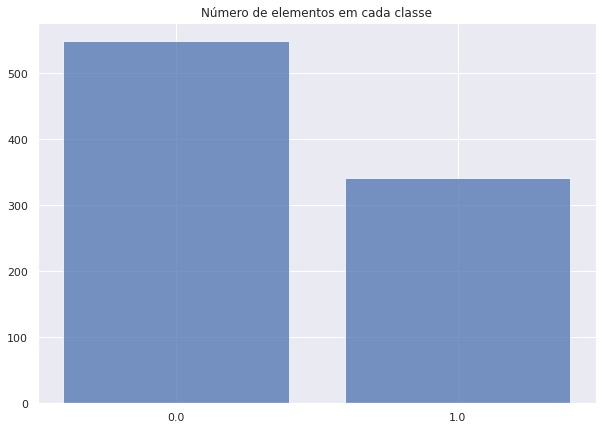

In [ ]:
classes = y_titanic
cl = np.unique(classes)
ncl = np.zeros(len(cl))
for i in np.arange(0, len(cl)):
    a = classes == cl[i]
    ncl[i] = len(classes[a])
    
numbers = np.arange(0, len(cl))

plt.figure(figsize=(10,7))
plt.bar(numbers, ncl,  alpha=.75)
plt.xticks(numbers, cl)
plt.title('Número de elementos em cada classe')
plt.show(True)

A relação entre sobreviventes e não-sobreviventes relativo ao gênero:

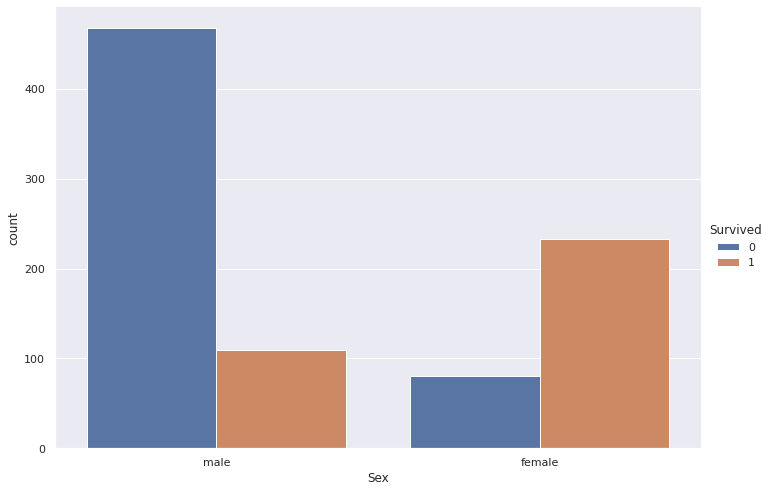

In [ ]:
sns.catplot(x ="Sex", hue ="Survived",
kind ="count", data = titanic_original, height=7, aspect=10/7)

A relação entre o ponto de embarque e da classe do passageiro e se ele sobreviveu:

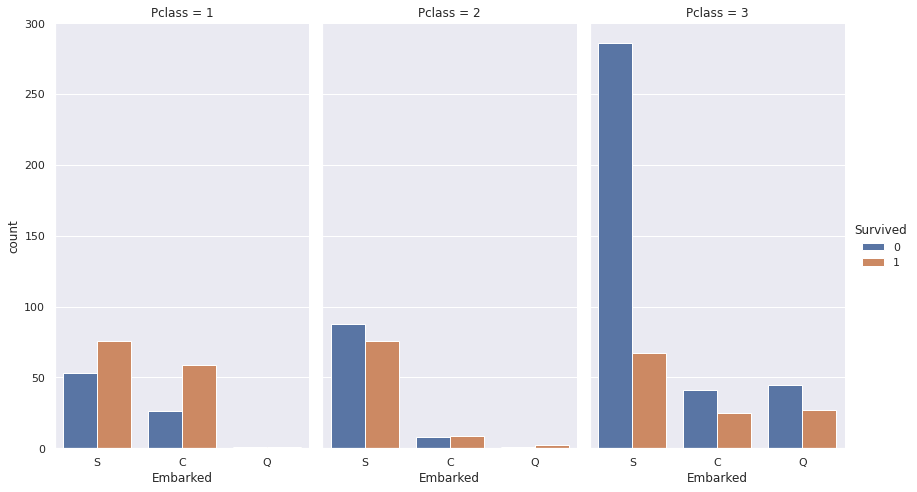

In [ ]:
sns.catplot(x ='Embarked', hue ='Survived',
kind ='count', col ='Pclass', data = titanic_original, height=7, aspect=4/7)

Como é possível ver, há uma maior taxa de sobreviventes na primeira classe e uma porcentagem relativa de não-sobreviventes maior na terceira classe.

Podemos também analisar as variáveis individualmente ou sua relação, de modo a entender melhor os dados.

Inicialmente, vamos analisar a correlação entre os atributos.

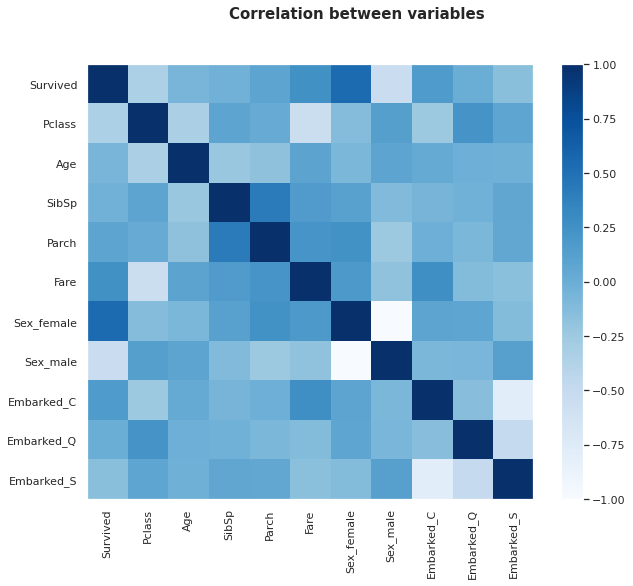

In [ ]:
corr = titanic.corr()
#Plot Correlation Matrix using Matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='Blues', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation between variables', fontsize=15, fontweight='bold')
plt.grid(False)
plt.show()

Como não há grandes relações entre os atributos, então conseguimos ver que cada atributo tem sua relevância para o conjunto de dados.

In [ ]:
def applyGridSearch(x_axis, y_axis):

    # Axis
    X = x_axis
    y = y_axis

    # no grid coloca os hiperparâmetros do algoritmo que serão testados (dicionário)
    # testará o valor de k com os seguintes valores e o hiperparâmetros weights com os valores 'uniform' e 'distance'
    knn_parameters = {'n_neighbors' : [1, 3, 5, 7, 9, 11, 13], 'weights' : ['uniform', 'distance']}
    # define o algoritmo de classificação que será usado
    knn = KNeighborsClassifier()
    ''' configura o GridSearch com o algoritmo de classificação = knn (instanciado), os parâmetros testados serão os 
        definidos em knn_parameters, usa cross-validation = 10 e a medida de avaliação é a acurácia.'''  
    gs_knn = GridSearchCV(knn, knn_parameters, cv=10, scoring='accuracy')
    # o grid search treinará todos os modelos conforme a parametrização acima
    gs_knn.fit(X, y)

    nb_parameters = {}
    nb = GaussianNB()
    gs_nb = GridSearchCV(nb, nb_parameters, cv=10, scoring='accuracy')
    # o grid search treinará todos os modelos conforme a parametrização acima
    gs_nb.fit(X, y)

    dt_parameters = {'criterion': ['gini','entropy'], 'splitter': ['best', 'random'], 'random_state' : [42]}
    dt = DecisionTreeClassifier()
    gs_dt = GridSearchCV(dt, dt_parameters, cv=10, scoring='accuracy')
    # o grid search treinará todos os modelos conforme a parametrização acima
    gs_dt.fit(X, y)

    mlp_parameters = {'hidden_layer_sizes' : [(5), (8), (15), (5, 3), (8, 5)],
              'solver' : ['lbfgs','sgd','adam'], 'max_iter' : [10000], 'random_state' : [42]}
    # define o algoritmo de classificação que será usado
    mlp = MLPClassifier()
    gs_mlp = GridSearchCV(mlp, mlp_parameters, cv=5, scoring='accuracy')
    # o grid search treinará todos os modelos conforme a parametrização acima
    gs_mlp.fit(X, y)

    return gs_knn, gs_nb, gs_dt, gs_mlp


In [ ]:
gs_knn, gs_nb, gs_dt, gs_mlp = applyGridSearch(X_titanic_train, y_titanic_train)

In [ ]:
view = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results = pd.DataFrame(gs_knn.cv_results_)
results[view].sort_values(by='rank_test_score')

,params,mean_test_score,std_test_score,rank_test_score
12,"{'n_neighbors': 13, 'weights': 'uniform'}",0.808480,0.051471,1
10,"{'n_neighbors': 11, 'weights': 'uniform'}",0.805495,0.051530,2
8,"{'n_neighbors': 9, 'weights': 'uniform'}",0.803980,0.054446,3
11,"{'n_neighbors': 11, 'weights': 'distance'}",0.795002,0.049671,4
6,"{'n_neighbors': 7, 'weights': 'uniform'}",0.793397,0.041789,5
13,"{'n_neighbors': 13, 'weights': 'distance'}",0.790547,0.051765,6
9,"{'n_neighbors': 9, 'weights': 'distance'}",0.790525,0.050049,7
7,"{'n_neighbors': 7, 'weights': 'distance'}",0.789032,0.043039,8
4,"{'n_neighbors': 5, 'weights': 'uniform'}",0.787494,0.043545,9
5,"{'n_neighbors': 5, 'weights': 'distance'}",0.786047,0.050907,10


In [ ]:
view = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results = pd.DataFrame(gs_nb.cv_results_)
results[view].sort_values(by='rank_test_score')

,params,mean_test_score,std_test_score,rank_test_score
0,{},0.790479,0.072562,1


In [ ]:
view = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results = pd.DataFrame(gs_dt.cv_results_)
results[view].sort_values(by='rank_test_score')

,params,mean_test_score,std_test_score,rank_test_score
0,"{'criterion': 'gini', 'random_state': 42, 'spl...",0.766554,0.048796,1
2,"{'criterion': 'entropy', 'random_state': 42, '...",0.762166,0.063720,2
1,"{'criterion': 'gini', 'random_state': 42, 'spl...",0.759136,0.059135,3
3,"{'criterion': 'entropy', 'random_state': 42, '...",0.757621,0.059212,4


In [ ]:
view = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results = pd.DataFrame(gs_mlp.cv_results_)
results[view].sort_values(by='rank_test_score')

,params,mean_test_score,std_test_score,rank_test_score
8,"{'hidden_layer_sizes': 15, 'max_iter': 10000, ...",0.820346,0.035755,1
0,"{'hidden_layer_sizes': 5, 'max_iter': 10000, '...",0.812905,0.030778,2
11,"{'hidden_layer_sizes': (5, 3), 'max_iter': 100...",0.809831,0.029296,3
5,"{'hidden_layer_sizes': 8, 'max_iter': 10000, '...",0.808349,0.037887,4
2,"{'hidden_layer_sizes': 5, 'max_iter': 10000, '...",0.805252,0.047212,5
14,"{'hidden_layer_sizes': (8, 5), 'max_iter': 100...",0.802424,0.045182,6
4,"{'hidden_layer_sizes': 8, 'max_iter': 10000, '...",0.797845,0.040449,7
7,"{'hidden_layer_sizes': 15, 'max_iter': 10000, ...",0.794883,0.048582,8
9,"{'hidden_layer_sizes': (5, 3), 'max_iter': 100...",0.794883,0.029548,8
13,"{'hidden_layer_sizes': (8, 5), 'max_iter': 100...",0.791886,0.038149,10


A partir da analise dos melhores hiperparâmetros dos classificadores, iremos realizar a classificação e a predição no conjunto teste:

In [ ]:
# Instancia do KNN
knn = KNeighborsClassifier(n_neighbors=13,weights='uniform')
# Treina o classificador com o conjunto de treino
knn.fit(X_titanic_train, y_titanic_train)
# Prediz as classes do conjunto de teste
predic_titanic_knn = knn.predict(X_titanic_test)

In [ ]:
acc_titanic_knn = accuracy_score(y_titanic_test, predic_titanic_knn)
print(f'A acurácia do KNN é: {acc_titanic_knn :.2%}')

A acurácia do KNN é: 82.51%


In [ ]:
# Instancia do Naive Bayes
nb = GaussianNB()
# Treina o classificador com o conjunto de treino
nb.fit(X_titanic_train, y_titanic_train)
# Prediz as classes do conjunto de teste
predic_titanic_nb = nb.predict(X_titanic_test)

In [ ]:
acc_titanic_nb = accuracy_score(y_titanic_test, predic_titanic_nb)
print(f'A acurácia do Naive Bayes é: {acc_titanic_nb :.2%}')

A acurácia do Naive Bayes é: 78.03%


In [ ]:
# Instancia da Árvore de Decisão
dt = DecisionTreeClassifier(criterion='gini', splitter='best', random_state=42)
# Treina o classificador com o conjunto de treino
dt.fit(X_titanic_train, y_titanic_train)
# Prediz as classes do conjunto de teste
predic_titanic_dt = dt.predict(X_titanic_test)

In [ ]:
acc_titanic_dt = accuracy_score(y_titanic_test, predic_titanic_dt)
print(f'A acurácia da Árvore de Decisão é: {acc_titanic_dt :.2%}')

A acurácia da Árvore de Decisão é: 73.54%


In [ ]:
# Instancia do MLP
mlp = MLPClassifier(hidden_layer_sizes= 15, max_iter=10000, random_state=42, solver='adam')
# Treina o classificador com o conjunto de treino
mlp.fit(X_titanic_train, y_titanic_train)
# Prediz as classes do conjunto de teste
predic_titanic_mlp = mlp.predict(X_titanic_test)

In [ ]:
acc_titanic_mlp = accuracy_score(y_titanic_test, predic_titanic_mlp)
print(f'A acurácia do MLP é: {acc_titanic_mlp :.2%}')

A acurácia do MLP é: 84.30%
